# A13

# Setup

In [1]:
# Load libraries
import sys
import sys
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    23:50:13 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    23:50:13 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    23:50:13 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [2]:
# Load data
ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests

ds_13_w = reload_winter("A103")

ds_13_s = reload_summer("A103")
ds_13_s = ds_13_s.isel(time=range(100,len(ds_13_s.time)))


In [3]:
# open client
from dask.distributed import Client

client = Client("tcp://127.0.0.1:34927")
client

<Client: 'tcp://127.0.0.1:34927' processes=4 threads=16, memory=125.81 GiB>

# Identifying summer thresholds

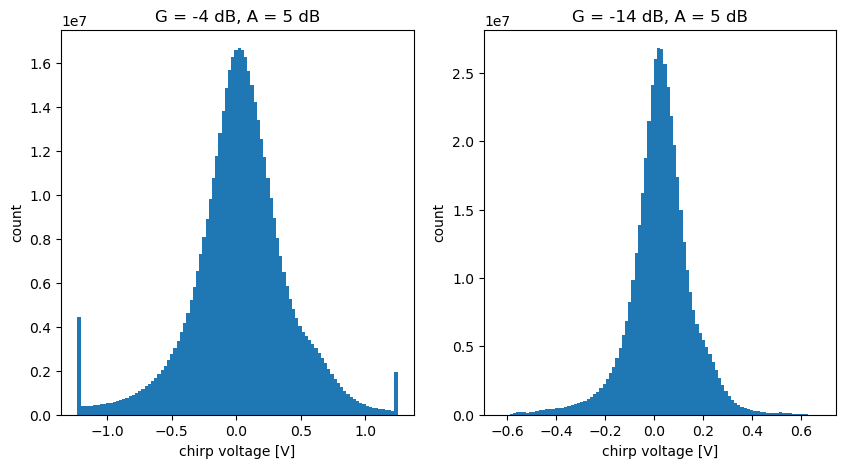

In [4]:
# take summer and plot histogram to identify attenuator settings and thresholds
plot_hist(ds_13)

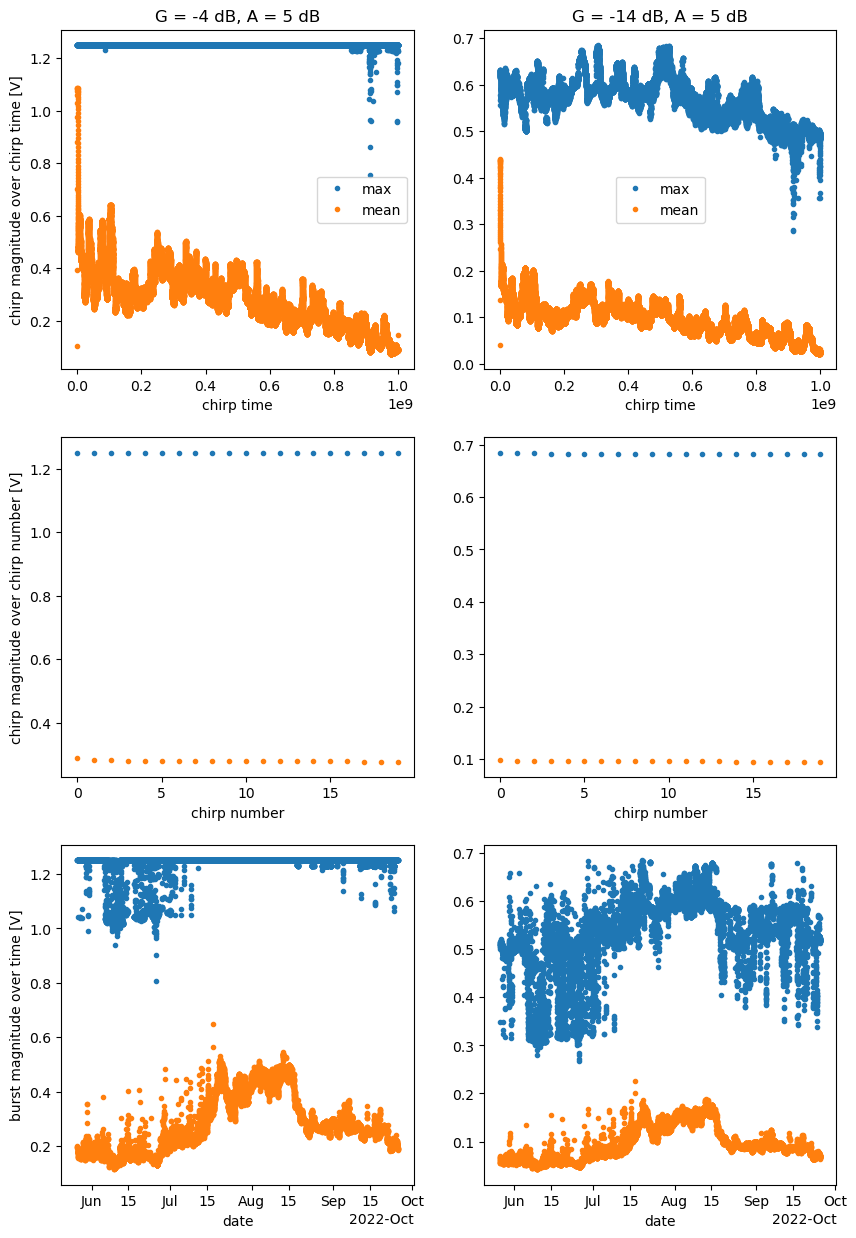

In [5]:
plot_amplitude_trends(ds_13)

Given the above plots, we pick the first set of attenuation settings and a threshold for clipping of 1.2 V. 

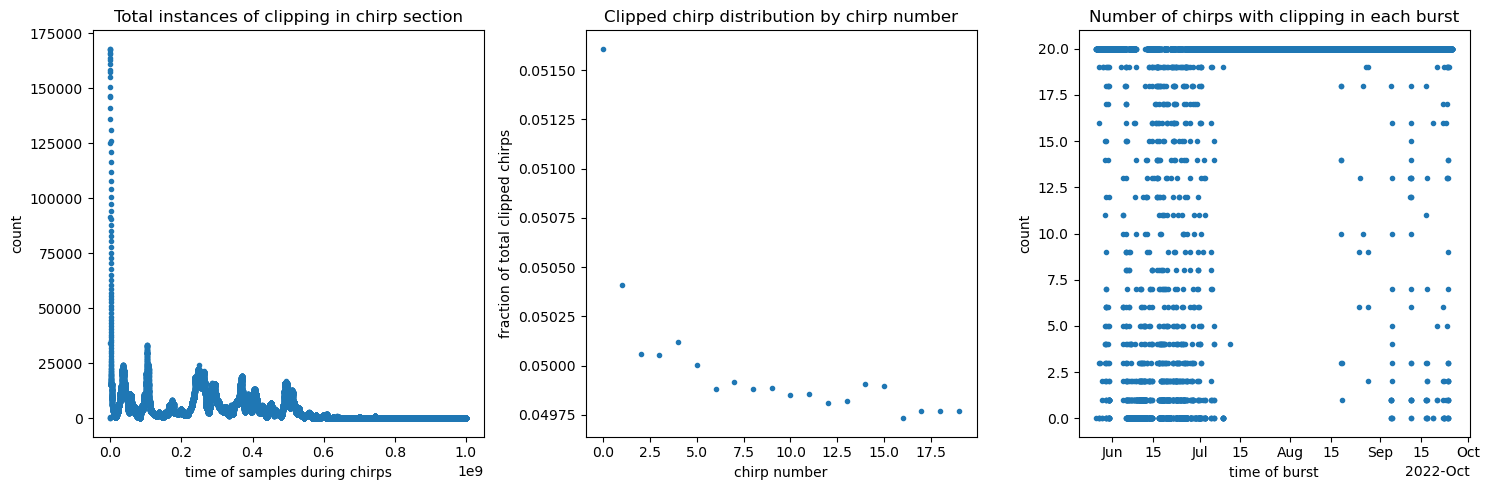

In [4]:
bad_chirp_condition = abs(ds_13.isel(attenuator_setting_pair=0).chirp) > 1.2

plot_bad_chirp_count(ds_13.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

In [5]:
test = custom_profile(ds_13.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)

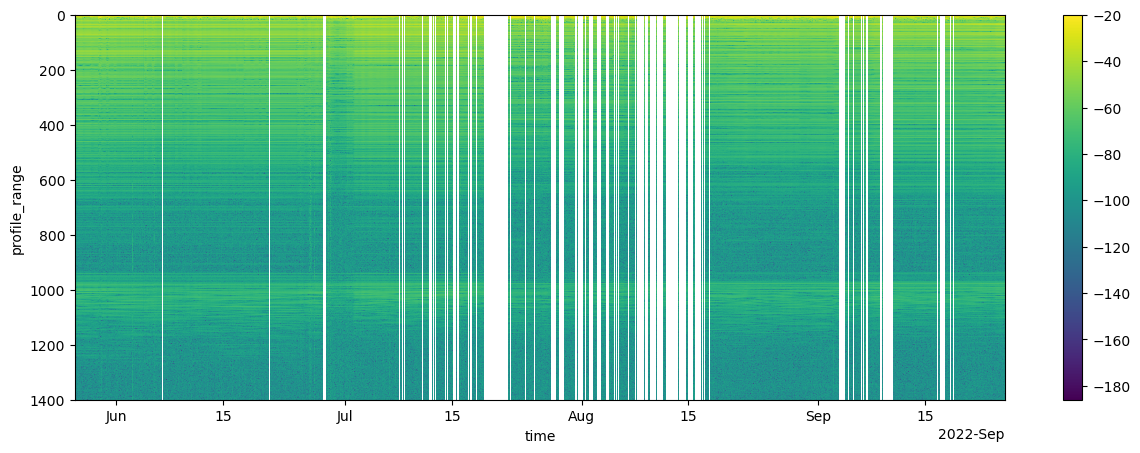

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

In [7]:
test = custom_profile(ds_13.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=30000)

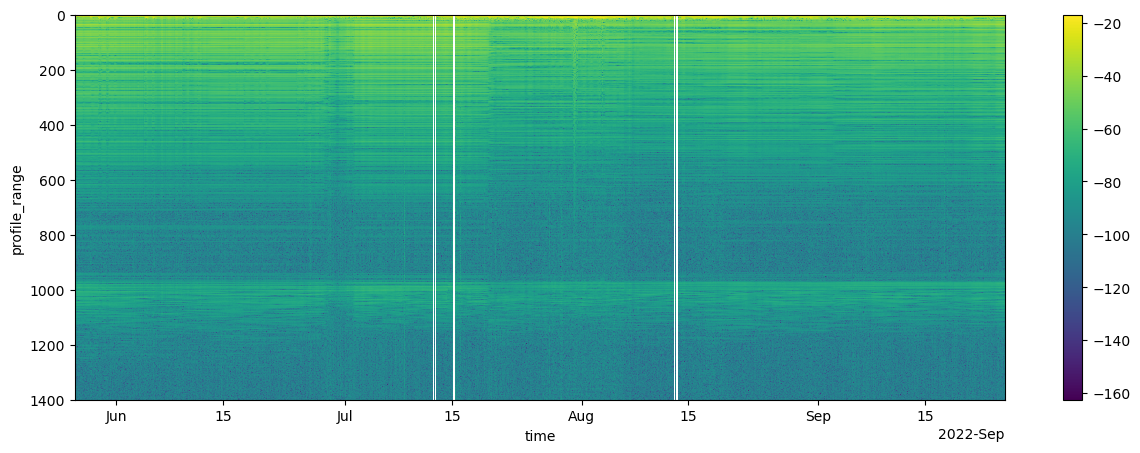

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

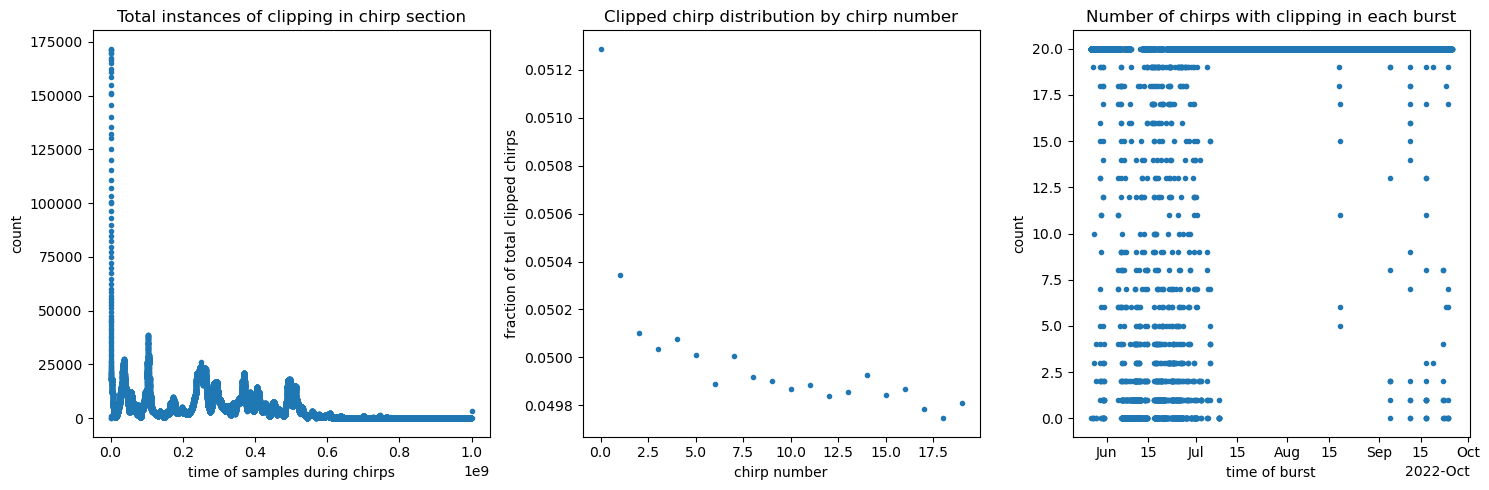

In [9]:
bad_chirp_condition = abs(ds_13.isel(attenuator_setting_pair=0).chirp) > 1.15

plot_bad_chirp_count(ds_13.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

In [10]:
test = custom_profile(ds_13.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.15,min_chirps = 5,start=30000)

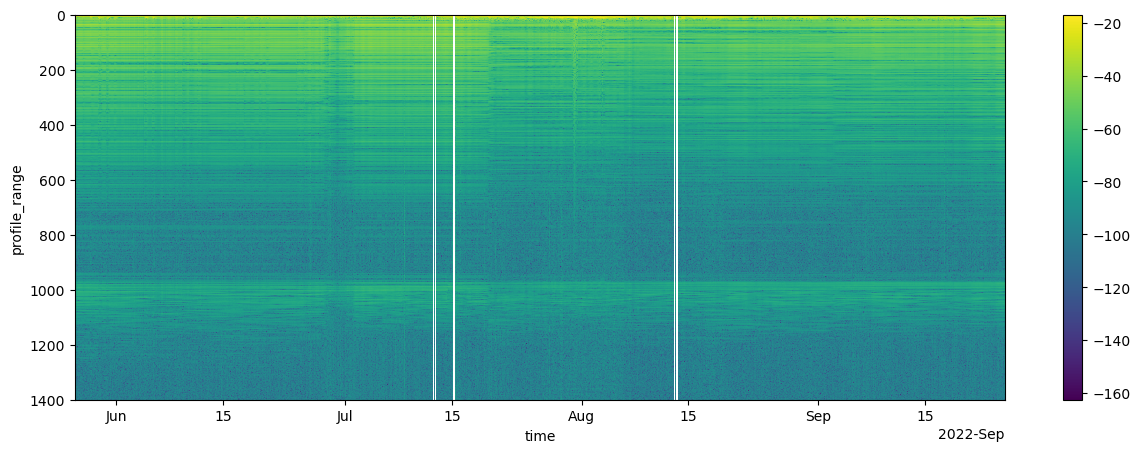

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

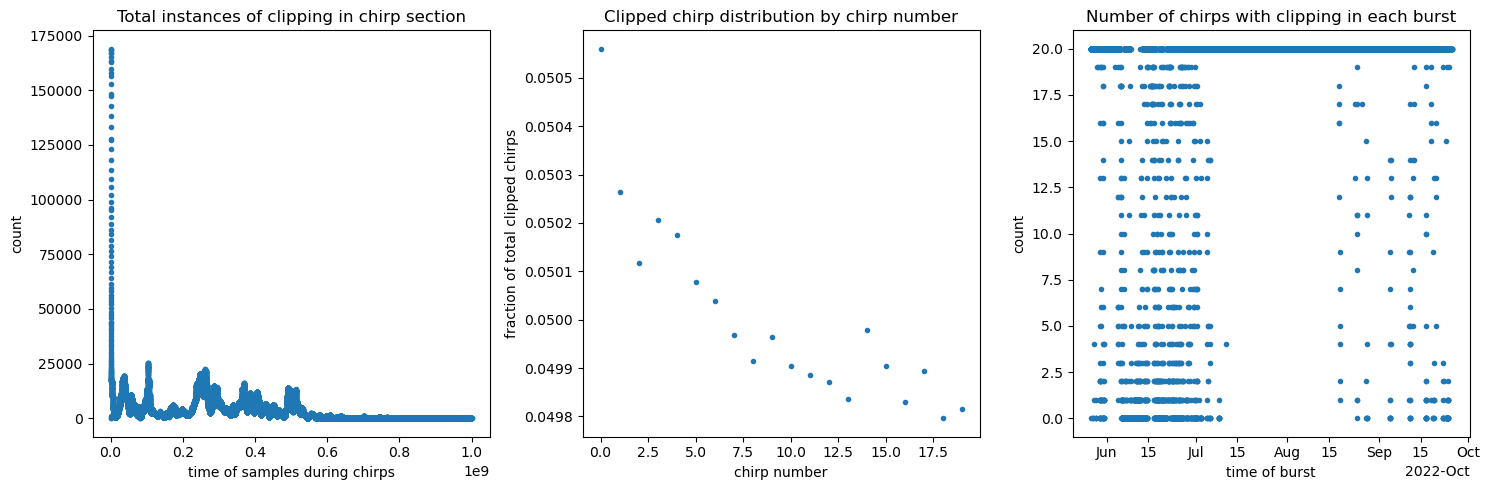

In [11]:
# try other setting
bad_chirp_condition = abs(ds_13.isel(attenuator_setting_pair=1).chirp) > 0.4

plot_bad_chirp_count(ds_13.isel(attenuator_setting_pair=1).chirp.where(bad_chirp_condition))

In [12]:
test = custom_profile(ds_13.isel(attenuator_setting_pair=1).chirp,clip_threshold=0.4,min_chirps = 5,start=30000)

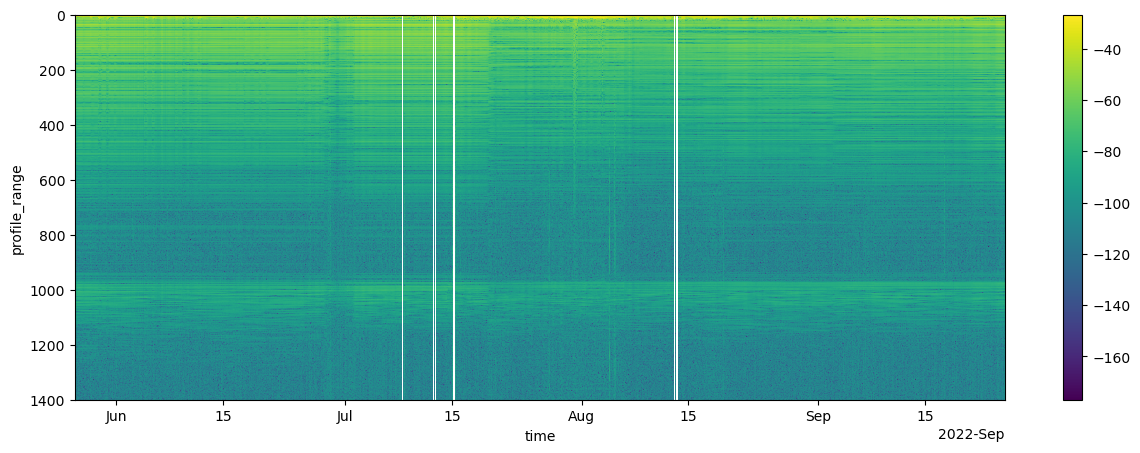

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

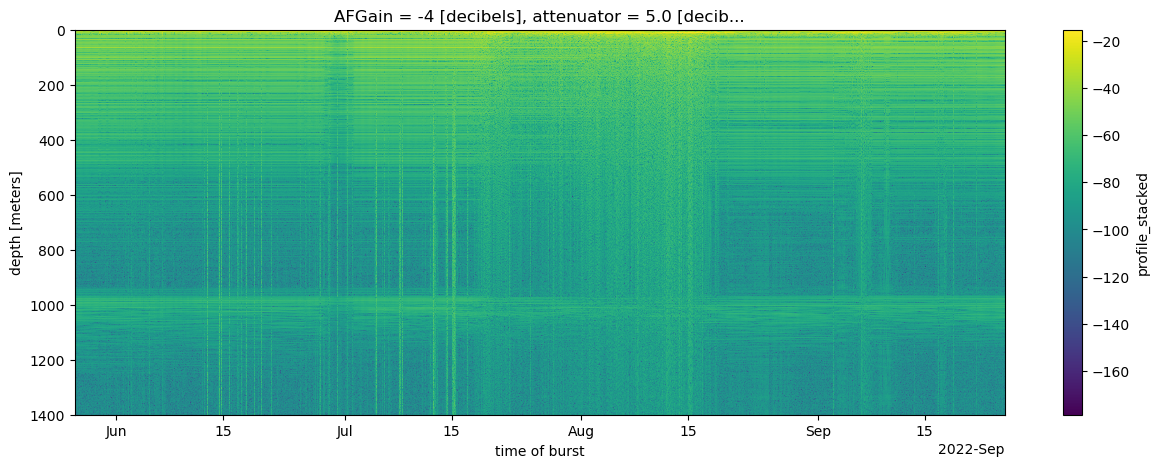

In [14]:
# original
fig, ax = plt.subplots(figsize=(15,5))

xa.dB(ds_13.isel(attenuator_setting_pair=0).profile_stacked).plot(x='time')
ax.invert_yaxis()

# Winter - look at plots from clipping.ipynb

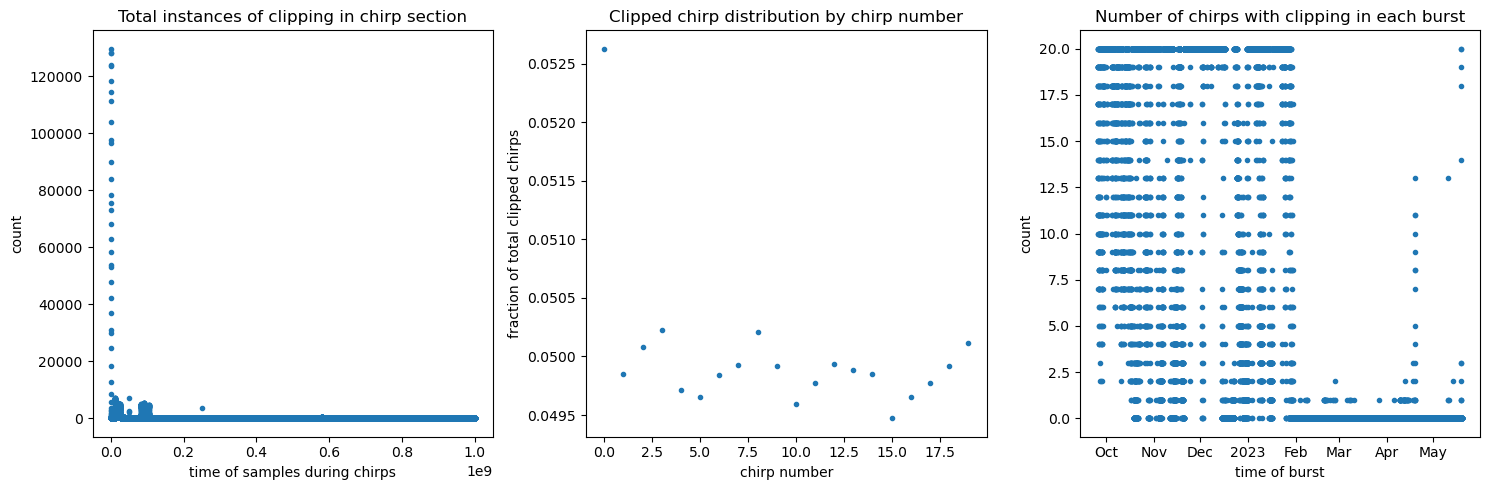

In [9]:
bad_chirp_condition = abs(ds_13_w.isel(attenuator_setting_pair=0).chirp) > 1.2

plot_bad_chirp_count(ds_13_w.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

In [14]:
test = custom_profile(ds_13_w.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=8000)

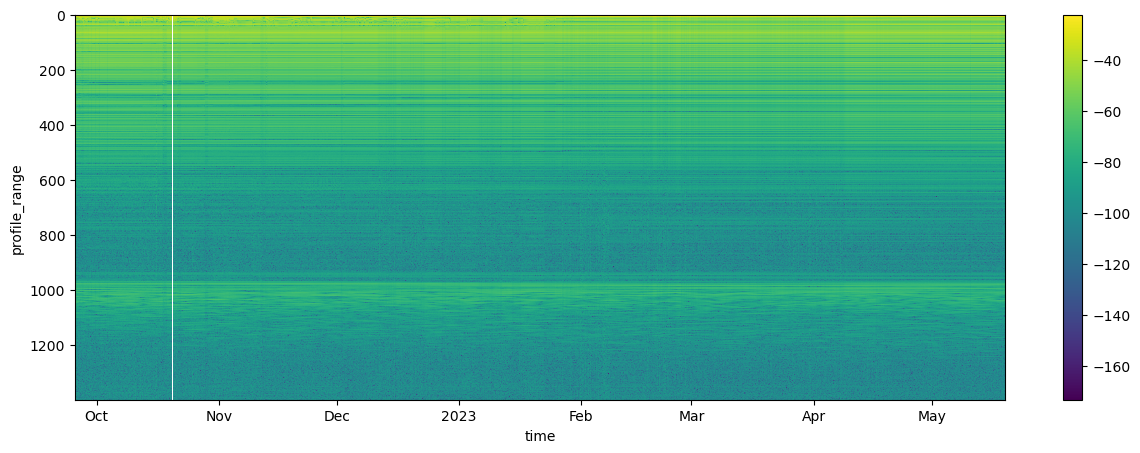

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

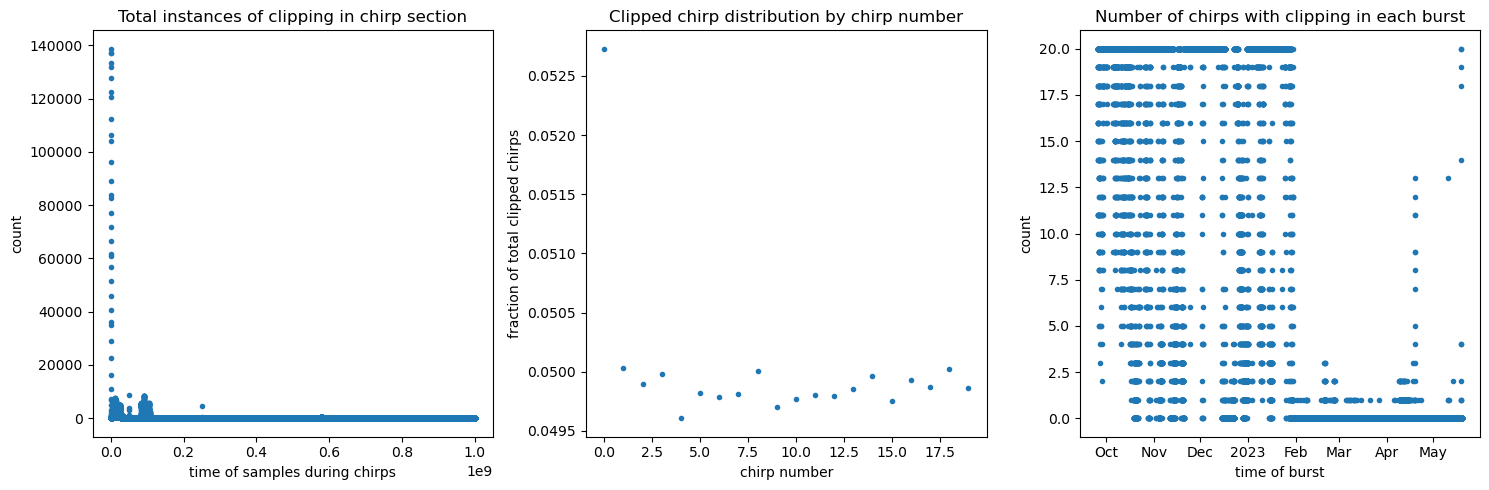

In [16]:
bad_chirp_condition = abs(ds_13_w.isel(attenuator_setting_pair=0).chirp) > 1.15

plot_bad_chirp_count(ds_13_w.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

In [17]:
test = custom_profile(ds_13_w.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.15,min_chirps = 5,start=8000)

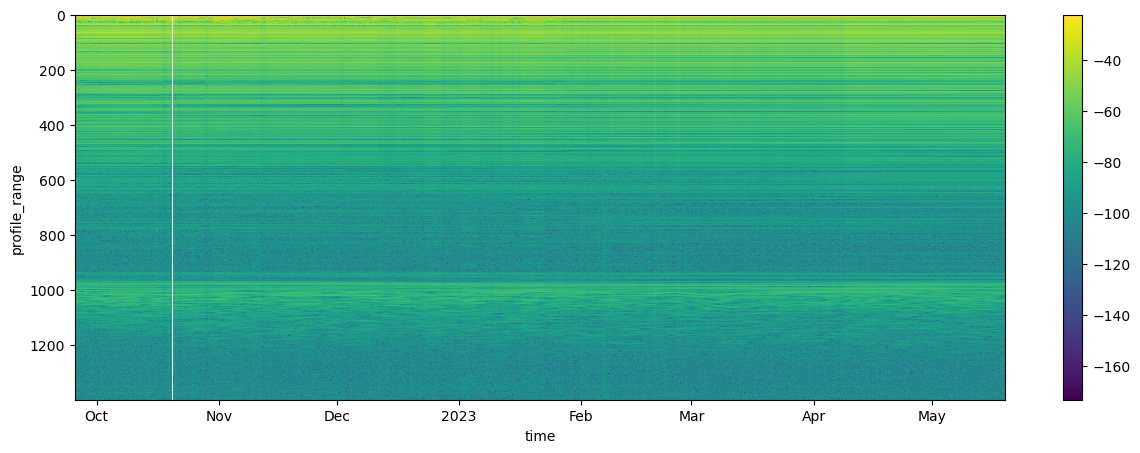

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

In [19]:
test = custom_profile(ds_13_w.isel(attenuator_setting_pair=1).chirp,clip_threshold=0.4,min_chirps = 5,start=8000)

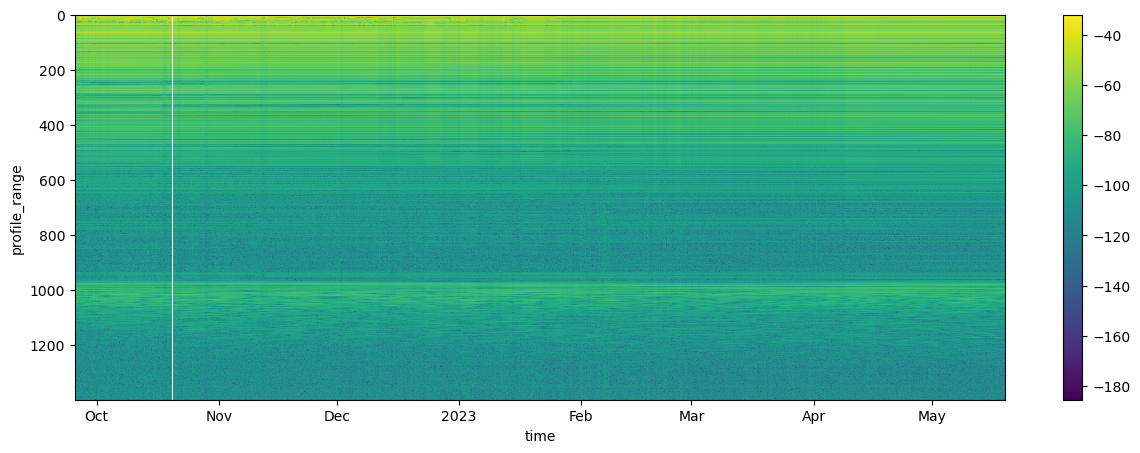

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

# Summer 2023

/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 14.51 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


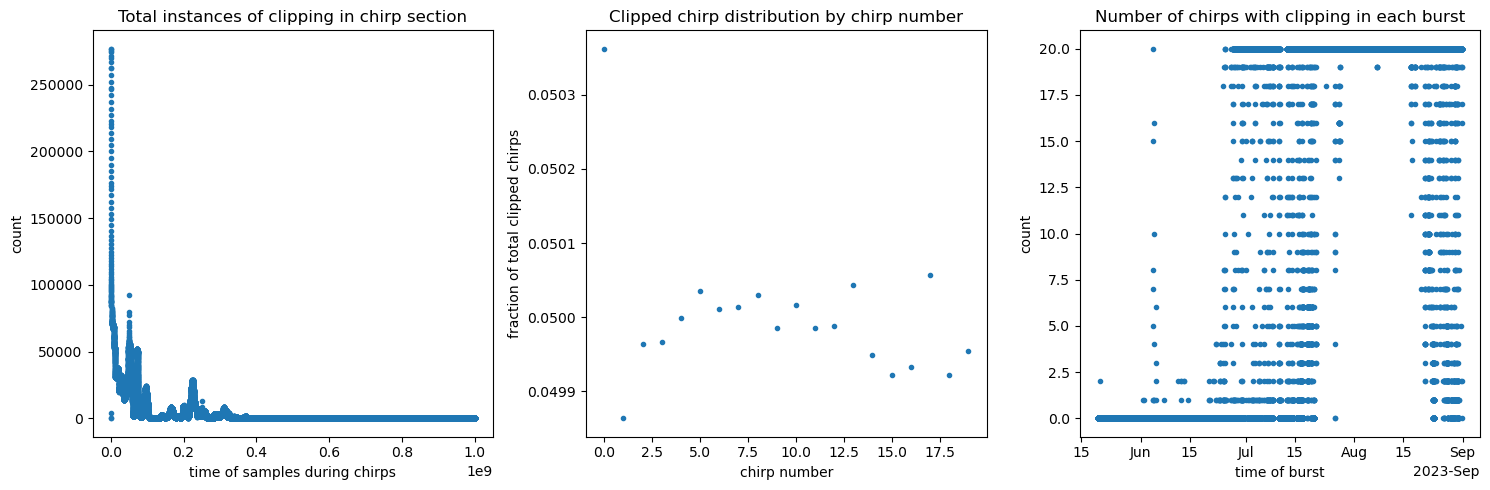

In [21]:
bad_chirp_condition = abs(ds_13_s.isel(attenuator_setting_pair=0).chirp) > 1.2

plot_bad_chirp_count(ds_13_s.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

In [22]:
test = custom_profile(ds_13_s.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)

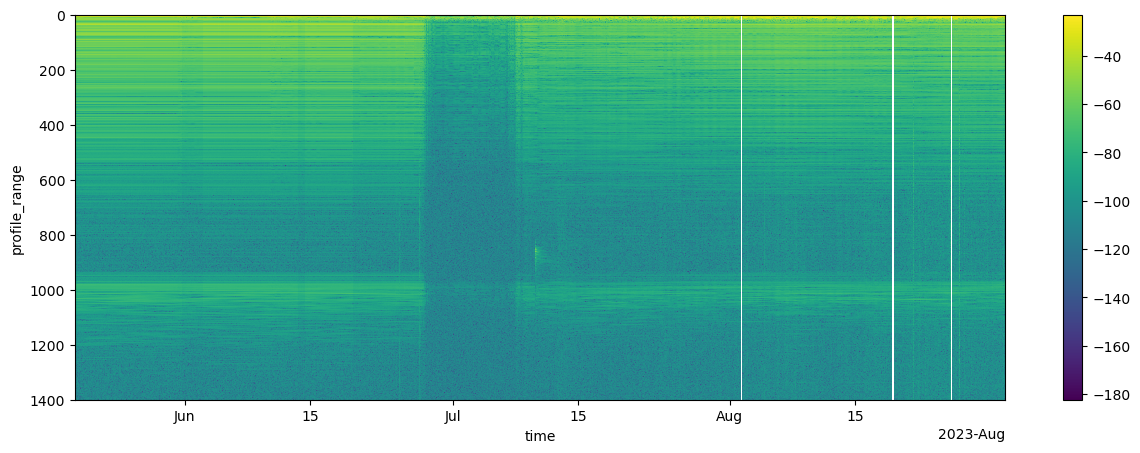

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 14.51 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


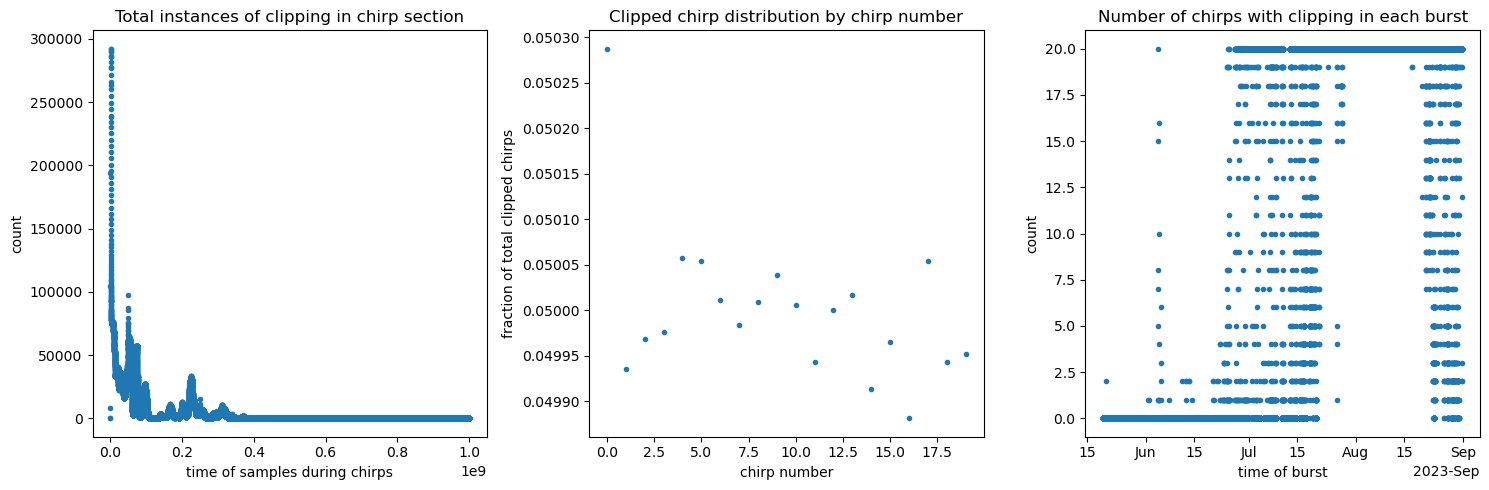

In [24]:
bad_chirp_condition = abs(ds_13_s.isel(attenuator_setting_pair=0).chirp) > 1.15

plot_bad_chirp_count(ds_13_s.isel(attenuator_setting_pair=0).chirp.where(bad_chirp_condition))

In [25]:
test = custom_profile(ds_13_s.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.15,min_chirps = 5,start=20000)

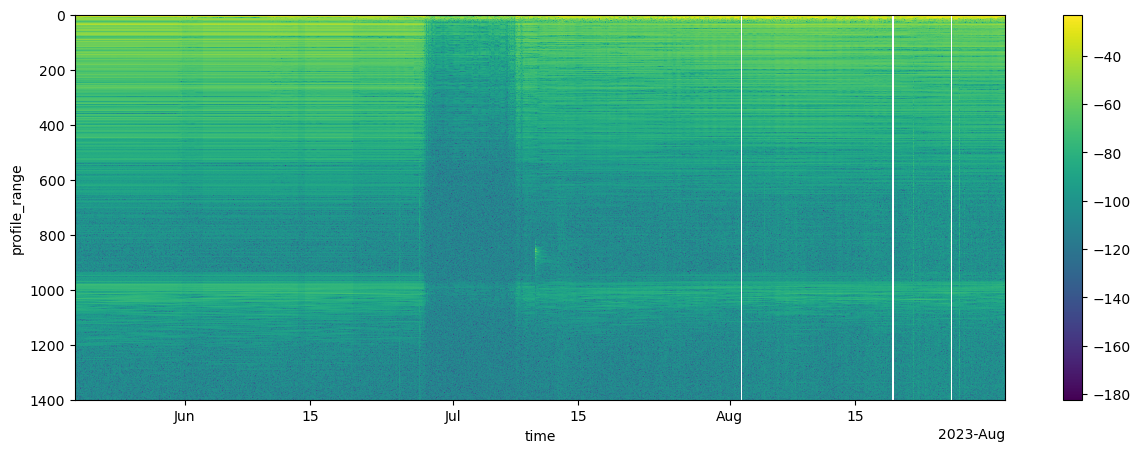

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

In [27]:
test = custom_profile(ds_13_s.isel(attenuator_setting_pair=1).chirp,clip_threshold=0.5,min_chirps = 5,start=20000)

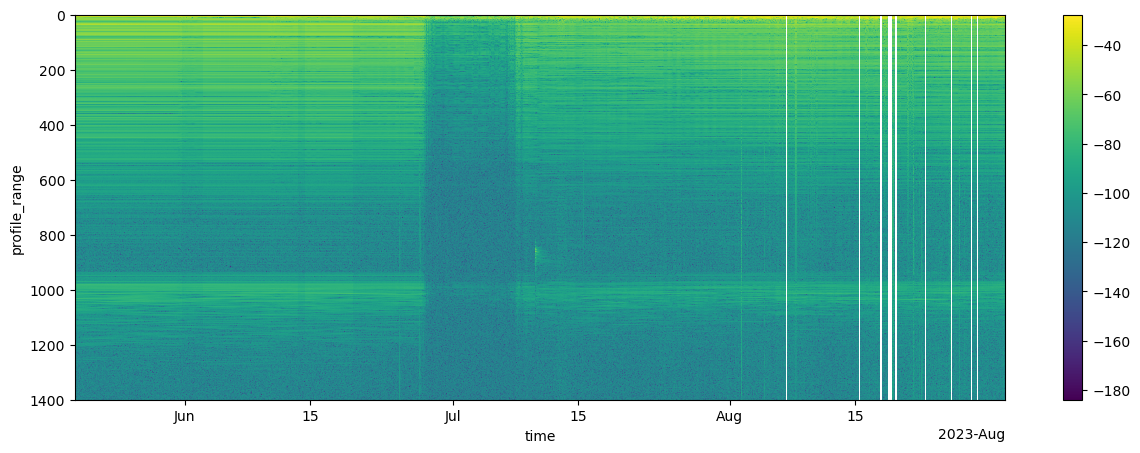

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()

/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 14.64 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


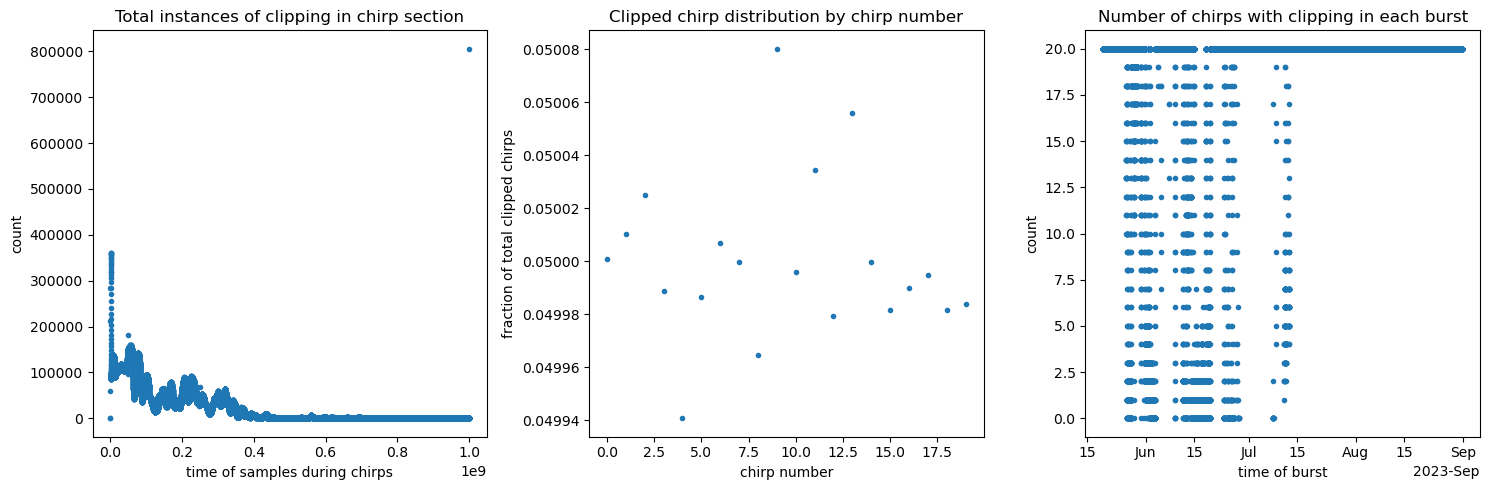

In [7]:
bad_chirp_condition = abs(ds_13_s.isel(attenuator_setting_pair=2).chirp) > 1.2

plot_bad_chirp_count(ds_13_s.isel(attenuator_setting_pair=2).chirp.where(bad_chirp_condition))

In [29]:
test = custom_profile(ds_13_s.isel(attenuator_setting_pair=2).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)

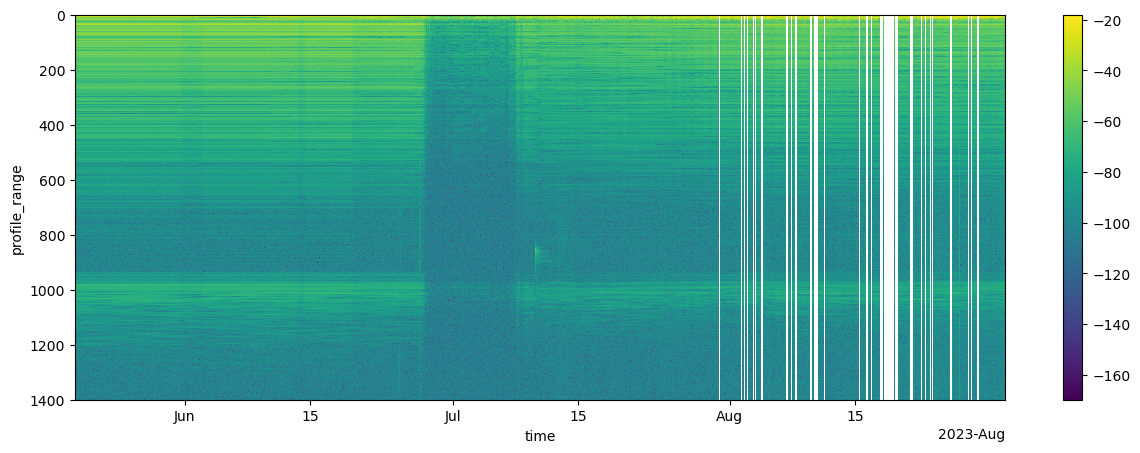

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()